In [1]:
# importing all the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#Dataset: Titanic Dataset
target variable: survived

In [ ]:
# another try to read from google drive
from google.colab import drive
drive.mount('/content/drive')

In [41]:
path = "/content/drive/MyDrive/Colab_Notebooks/train.csv"
train = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train.loc[(train.Pclass == 2)].loc[(train.Cabin.notna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# get titanic & test csv files as a DataFrame
print(train.shape)

(891, 12)


In [43]:
train.isnull().sum()
# print(type(train.isnull().sum())) -- <class 'pandas.core.series.Series'>

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=["Train"])
print(type(NAs))
NAs[NAs.sum(axis=1) > 0]

<class 'pandas.core.frame.DataFrame'>


,Train
Age,177
Cabin,687
Embarked,2


In [44]:
len(train.Cabin.unique().tolist()) # This has too many categories, better to drop

148

In [ ]:
# removing columns, which are having not required for classification
train.pop("Cabin")
train.pop("Name")
train.pop("Ticket")

In [46]:
# Filling missing Age values with mean
train["Age"] = train["Age"].fillna(train["Age"].mean())

In [47]:
# Filling missing Embarked values with most common value
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0]) #as it is categorical

In [48]:
np.unique(train.Pclass) # which class passenger booked the ticket

array([1, 2, 3])

In [49]:
train["Pclass"] = train["Pclass"].apply(str) # we need to make it categorical, as this data is ordinal, 1 with higher priority

In [50]:
# Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == "object"].index:
    for_dummy = train.pop(col) #removing the particular object column from train set, 
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1) # conatenating the original dataset with the transformed categorical column
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [51]:
labels = train.pop("Survived") #this is the target variable

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [53]:
# using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #with all default parameters
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
y_pred = rf.predict(x_test)

In [55]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# The below gives the accuracy as per the default RF model

0.7706330491565391

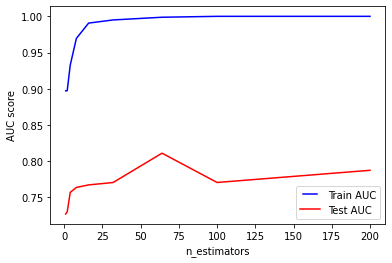

In [62]:
# now we will try to find the various values for hyper-parameter tuning
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train) #fitting the model

   # accuracy of the model on train set
   train_pred = rf.predict(x_train) #predicting the tr
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   # accuracy of the model on test set
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

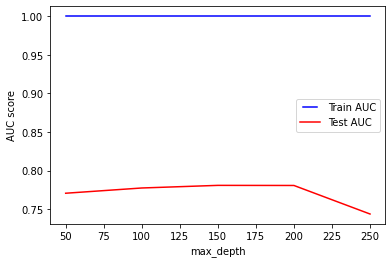

In [63]:
# now we will try to find the various values for hyper-parameter tuning
# n_estimators == 75 #highest accurach
max_depth = [50, 100, 150, 200, 250]
train_results = []
test_results = []

for depth in max_depth:
   rf = RandomForestClassifier(n_estimators=75, max_depth = depth, n_jobs=-1)
   rf.fit(x_train, y_train) #fitting the model

   # accuracy of the model on train set
   train_pred = rf.predict(x_train) #predicting the tr
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   # accuracy of the model on test set
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depth, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max_depth")
plt.show()

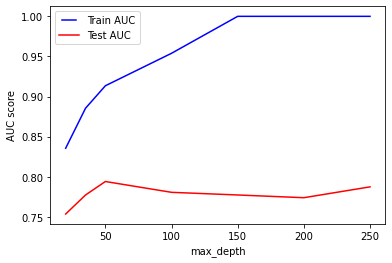

In [65]:
# now we will try to find the various values for hyper-parameter tuning
# n_estimators == 75 #highest accurach
# max_depth = 200 best
max_leaf_nodes = [20, 35, 50, 100, 150, 200, 250]
train_results = []
test_results = []

for leaf in max_leaf_nodes:
   rf = RandomForestClassifier(n_estimators=75, max_depth = 200, max_leaf_nodes=leaf, n_jobs=-1)
   rf.fit(x_train, y_train) #fitting the model

   # accuracy of the model on train set
   train_pred = rf.predict(x_train) #predicting the tr
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   # accuracy of the model on test set
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_leaf_nodes, train_results, "b", label="Train AUC")
line2, = plt.plot(max_leaf_nodes, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max_depth")
plt.show()

In [67]:
# now we will try to find the various values for hyper-parameter tuning; all these are with repect to test data
# n_estimators == 75 #highest accurach
# max_depth = 200 best
# max_leaf_nodes = 50 best
# n_jobs = -1; -1 means using all processors,  jobs to run in parallel.

# using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=75, max_depth=200, max_leaf_nodes=50, n_jobs=-1) #with all default parameters
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# The below gives the accuracy as per the hyper-parameter y=tuning in RF model

0.7806548158897152